In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Teoría

## 1- 10 puntos

La formula del R2 es:

$$R^2 = \frac{Var(errorPromedio) - Var(errorModelo)}{Var(errorPromedio)}$$

Convenceme que entiendes esta formula y porque esto tiene sentido


A comparación de la fórmula "convencional" para el cálculo de R2 se usa esta, que utiliza las varianzas tanto del error promedio, como del error del modelo. Al sustraer la varianza del error del modelo, del error promedio y dividirlo entre el error promedio, el resultado explica la magnitud en la que hay de la variabilidad en la variable dependiente (en términos de la clase, la variabilidad del activo contra el mercado). Los valores que puede tomar R2 van desde 0 hasta 1, donde en 0 no se explica nada la variabilidad del activo, mientras que en 1 se explica completamente. Teniendo en cuenta esto es adecuado decir, que mientras más alto es el valor de R2 mejor será el modelo de ajuste calculado.

# 2- 20 puntos

¿Qué es una regresión lineal y para que sirve?
¿Qué es el gradiente descendiente? ¿Cómo uso eso para encontrar los mejores coeficientes de una regresión lineal?


Responde estas preguntas, convenceme que entiendes que es una regresión lineal y de donde salen los coeficientes

Una regresión lineal es un ajuste que se hace, con base en puntos en un plano cartesiano. Con la regresión lineal se busca encontrar la ecuación de una recta que mejor se ajuste al modelo, es decir, que quede lo más cera posible a todos los puntos. En el sentido de la clase utilizamos al mercado como el eje x, y al activo como al eje y. El coeficiente del término lineal del modelo nos dice cual es la beta del activo respecto al mercado.

El gradiente descendiente es un proceso mediante el cuál se busca encontrar el mejor ajuste posible. Mediante varias iteraciones evalúa el modelo predicho comparándolo con los datos reales (función de pérdida), tomando en cuenta una métrica de error. El gradiente es el factor que indica la dirección y magnitud de cambio de coeficientes necesario para un mejor ajuste. Este proceso se repite multiples veces hasta que la función de pérdida converge a un valor ínfimo. En ese momento, se toman los coeficientes calculados como la regresión lineal (línea con mejor ajuste a los puntos).

# 3- 5 puntos
¿Por qué hay empresas con valuaciones bajas respecto a sus ganancias?

Si una empresa tiene valuaciones bajas respecto a sus ganancias, significa que se está hablando de una empresa con un P/E ratio bajo. Esto se puede deber a múltiples factores, algúnos de ellos es que el mercado no considera que la empresa tiene mucho crecimiento posible a futuro. Esto se presenta principalmente en empresas más grandes ya que es más dificil que éstas tengan un crecimiento porcentualmente mayor al de empresas pequeñas.

# 4- 10 puntos

La utilidad de un activo es:

$$Utiliad = E[P] - \alpha *\frac{1}{2} Var(P) $$

Explica porque esto tiene sentido  en el mundo de los econos


Tiene sentido por el factor $\alpha$. Este es la forma en la que se le puede retribuir a los inversores una compensasión dependiendo de su aversión al riesgo. Existe una relación inversa entre la aversión al riesgo y la utilidad. Con la fórmula se busca encontrar un equilibrio cómodo en el que haya una relación coherente entre rendimiento y riesgo.

## 5- 5 puntos
Explica en 3 renglones la hopitesis de mercados eficientes

Explica porque no es posible que los inversores logren ganarle al mercado. Es imposible, ya que las empresas presentan toda la información, por lo que no hay activos sobre ni infravalorados. Con esto se sobreentiende que no serviría el análisis técnico, ya que la única manera de obtener un rendimiento mayor al del mercado sería mediante información privilegiada.

# Práctica

### 30%

Baja del 2016 a 2021, de forma diaria las acciones de:


- Apple
- Amazon
- Discover
- Cotsco
- Starbucks


- Obten el portafolio de mínima varianza
- Obten una gráfica de todos los posibles portafolios
- Calcula la beta de cada uno de esos activos
- Calcula el R2 de cada uno de esos activos
- Cuanto debes invertir en ese portafolio dado los cooeficientes de aversión : [1, 2, 3, 4, 5, 6, 6, 7]
- Obten el R2 y Beta con bootstrap de cada uno de esos activos
  Responde: probabilidad beta > 1  y probabilidad r2 > 0.5
  
  
### CAPM, Fama french y 5 factores (20%)

Sobre el portafolio anterior, crea los 3 distintos modelos vistos en clase.

¿Cuál es el R2 de cada uno?  Crea un boostrap de cada uno de los R2

Explica conclusiones

####Descarga de datos

In [2]:
tickers2 = ['AAPL', 'AMZN', 'DFS', 'COST', 'SBUX',
           'VTI']
tickers = tickers2.copy()
tickers.remove("VTI")
start_date = '2016-01-01'
end_date = "2024-05-01"

St = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
Stock = yf.download(tickers2, start=start_date, end=end_date)['Adj Close']
rt = St.pct_change().dropna()
returns = Stock.pct_change().dropna()

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  6 of 6 completed


####Portafolio de mínima varianza

In [3]:
sigma = rt.cov()

n_port = 10000
n_act = len(rt.keys())

W = np.random.dirichlet((1,) * n_act, size=n_port)

rendimientos = W.dot(rt.mean()) * 252

zeros = np.zeros(n_port)
for j in range(len(zeros)):
    zeros[j] = W[j, :].dot(sigma).dot(W[j, :])
volatility = zeros**(1/2) * 252**(1/2)

rf = 0.03

sharpe = (rendimientos - rf) / volatility

resultados = pd.DataFrame({
    "Expected_value": rendimientos,
    "Volatility": volatility,
    "Sharpe": sharpe
})

for j in range(len(tickers)):
    ticker_temp = tickers[j]
    resultados["W_" + ticker_temp] = W[:, j]

min_var = resultados[resultados.Volatility == resultados.Volatility.min()]
emv = resultados[resultados.Sharpe == resultados.Sharpe.max()]

emv_volatility = emv.Volatility.values[0]
emv_expected_value = emv.Expected_value.values[0]

min_var

,Expected_value,Volatility,Sharpe,W_AAPL,W_AMZN,W_DFS,W_COST,W_SBUX
3888,0.200551,0.198715,0.858271,0.102332,0.039262,0.565315,0.026235,0.266855


In [4]:
emv

,Expected_value,Volatility,Sharpe,W_AAPL,W_AMZN,W_DFS,W_COST,W_SBUX
9759,0.244579,0.211543,1.014352,0.302881,0.112326,0.545418,0.03311,0.006266


####Gráfica de todos los posibles portafolios

Text(0, 0.5, '$E[x]$')

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y)

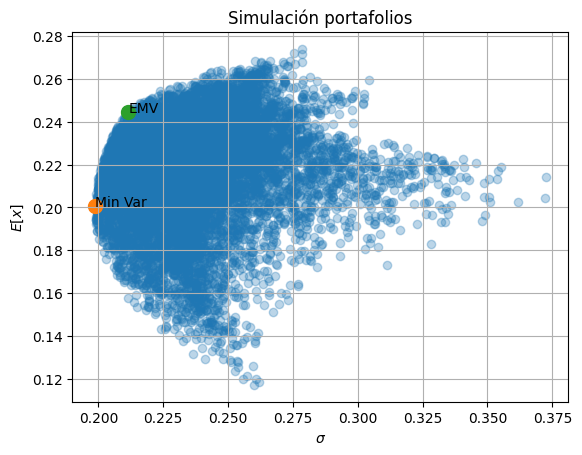

In [5]:
plt.figure()
plt.scatter(resultados.Volatility, resultados.Expected_value, alpha=0.3)
plt.scatter(min_var.Volatility, min_var.Expected_value, s=100)
plt.text(min_var.Volatility, min_var.Expected_value, "Min Var")
plt.scatter(emv.Volatility, emv.Expected_value, s=100)
plt.text(emv.Volatility, emv.Expected_value, "EMV")
plt.grid()
plt.title("Simulación portafolios")
plt.xlabel("$\sigma$")
plt.ylabel("$E[x]$")

####Betas y R2s de todos los activos

In [6]:
r2s = []
betas = []

for i in tickers:
    X = returns[["VTI"]]
    y = rt[[i]]

    #Calculo de beta
    model = LinearRegression().fit(X, y)
    beta = model.coef_[0][0]
    betas.append(beta)

    #Calculo de R2
    predictions = model.predict(X)
    r2 = r2_score(y_true=y, y_pred=predictions)
    r2s.append(r2)

df = pd.DataFrame()
df["tickers"] = tickers
df["betas"] = betas
df["r2"] = r2s
df

,tickers,betas,r2
0,AAPL,1.172828,0.563829
1,AMZN,1.116406,0.398181
2,DFS,1.501478,0.482101
3,COST,0.696070,0.340120
4,SBUX,0.990600,0.465725


####LAC con diferentes aversiones al riesgo

In [7]:
gamma = np.linspace(1, 8, 8)

lac_emv = pd.DataFrame({
    "gamma": gamma,
    "w_acciones": (emv_expected_value - rf) / (gamma * emv_volatility**2)
})

lac_emv["w_bonos"] = 1 - lac_emv.w_acciones

media_lac = lac_emv.w_acciones * emv_expected_value + lac_emv.w_bonos * rf
vol_lac = lac_emv.w_acciones * emv_expected_value

media = []
vol = []

for j in range(len(media_lac)):
    media.append(media_lac.values[j])
    vol.append(vol_lac.values[j])

lac_emv["media"] = media
lac_emv["vol"] = vol

lac_emv

,gamma,w_acciones,w_bonos,media,vol
0,1.0,4.795010,-3.795010,1.058909,1.172760
1,2.0,2.397505,-1.397505,0.544455,0.586380
2,3.0,1.598337,-0.598337,0.372970,0.390920
3,4.0,1.198753,-0.198753,0.287227,0.293190
4,5.0,0.959002,0.040998,0.235782,0.234552
5,6.0,0.799168,0.200832,0.201485,0.195460
6,7.0,0.685001,0.314999,0.176987,0.167537
7,8.0,0.599376,0.400624,0.158614,0.146595


####Bootstrap de beta y R2

In [8]:
betas_dict = {}
r2_dict = {}
model = LinearRegression()
n_reps = 1000

for i in tickers:
    betas_dict[i] = []
    r2_dict[i] = []
    for j in range(n_reps):
        #Betas
        flag_frame = returns.sample(len(returns), replace=True)
        X = flag_frame[["VTI"]]
        y = flag_frame[[i]]
        model.fit(X, y)
        beta = model.coef_[0][0]
        betas_dict[i].append(beta)

        #R2
        predictions = model.predict(X)
        r2 = r2_score(y_true=y, y_pred=predictions)
        r2_dict[i].append(r2)

df_betas_bootstrap = pd.DataFrame({})

for i in tickers:
    df_betas_bootstrap[i] = betas_dict[i]

df_betas_bootstrap

,AAPL,AMZN,DFS,COST,SBUX
0,1.148629,1.171832,1.525800,0.729075,1.002702
1,1.202379,1.162036,1.380249,0.666331,0.946546
2,1.183939,1.126844,1.396169,0.665146,0.965691
3,1.153371,0.982412,1.450774,0.727731,0.945926
4,1.182942,1.199172,1.548181,0.718069,1.045720
...,...,...,...,...,...
995,1.163264,1.127912,1.470681,0.730468,0.963019
996,1.171247,1.071852,1.531847,0.755349,1.000071
997,1.199595,1.042940,1.424742,0.732644,0.959466
998,1.183181,1.098322,1.519525,0.671948,0.943764


In [9]:
df_r2s_bootstrap = pd.DataFrame({})

for i in tickers:
    df_r2s_bootstrap[i] = r2_dict[i]

df_r2s_bootstrap

,AAPL,AMZN,DFS,COST,SBUX
0,0.576390,0.390384,0.454947,0.361444,0.515939
1,0.582511,0.388011,0.474775,0.344838,0.456869
2,0.565223,0.415430,0.462422,0.298034,0.447350
3,0.561482,0.351103,0.468460,0.342077,0.453549
4,0.596585,0.438695,0.513445,0.344033,0.508982
...,...,...,...,...,...
995,0.564549,0.408682,0.479448,0.362054,0.452572
996,0.576850,0.415680,0.480218,0.375161,0.491923
997,0.609953,0.371704,0.409625,0.350324,0.478534
998,0.536879,0.364795,0.476742,0.339521,0.406226


#####Preguntas sobre bootstrap

In [10]:
for i in tickers:
    print("La probabilidad de que la beta de " + i + " sea mayor a 1 es de: " + str(np.round(((df_betas_bootstrap[i] > 1).mean()) * 100, 2)) + "%")
    print("La probabilidad de que el R2 de " + i + " sea mayor a 0.5 es de: " + str(np.round(((df_r2s_bootstrap[i] > 0.5).mean()) * 100, 2)) + "%")
    print()

La probabilidad de que la beta de AAPL sea mayor a 1 es de: 100.0%
La probabilidad de que el R2 de AAPL sea mayor a 0.5 es de: 98.6%

La probabilidad de que la beta de AMZN sea mayor a 1 es de: 97.5%
La probabilidad de que el R2 de AMZN sea mayor a 0.5 es de: 0.0%

La probabilidad de que la beta de DFS sea mayor a 1 es de: 100.0%
La probabilidad de que el R2 de DFS sea mayor a 0.5 es de: 29.5%

La probabilidad de que la beta de COST sea mayor a 1 es de: 0.0%
La probabilidad de que el R2 de COST sea mayor a 0.5 es de: 0.0%

La probabilidad de que la beta de SBUX sea mayor a 1 es de: 37.7%
La probabilidad de que el R2 de SBUX sea mayor a 0.5 es de: 16.5%



####CAPM, Fama french y 5 factores

In [11]:
start_date = datetime.datetime(2016, 1, 1)
end_date = datetime.datetime(2024, 5, 1)

ff_factores = web.DataReader("F-F_Research_Data_5_Factors_2x3", "famafrench", start_date, end_date)

factors_df = ff_factores[0] / 100
factors_df.index = factors_df.index.to_timestamp()

<ipython-input-11-1eba0bcad41d>:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factores = web.DataReader("F-F_Research_Data_5_Factors_2x3", "famafrench", start_date, end_date)
<ipython-input-11-1eba0bcad41d>:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factores = web.DataReader("F-F_Research_Data_5_Factors_2x3", "famafrench", start_date, end_date)


In [12]:
stock_data = yf.download(tickers, start_date, end_date, interval='1mo')['Adj Close']
rt = stock_data.pct_change().dropna()

fama_french_df = pd.merge(rt, factors_df, on='Date')

[*********************100%%**********************]  5 of 5 completed


In [13]:
def run_all_models(data, ticker):
    flag_data = data.copy()
    flag_data[ticker + '_minus_RF'] = data[ticker] - data['RF']
    y = flag_data[[ticker + '_minus_RF']]

    # CAPM
    X_capm = flag_data[['Mkt-RF']]
    model_capm = LinearRegression().fit(X_capm, y)
    prediction_capm = model_capm.predict(X_capm)
    r2_capm = r2_score(y_pred=prediction_capm, y_true=y)
    summary_capm = {str(X_capm.keys().values): list(model_capm.coef_[0])}

    # 3 factor model
    X_3factor = flag_data[['Mkt-RF', 'SMB', 'HML']]
    model_3factor = LinearRegression().fit(X_3factor, y)
    prediction_3factor = model_3factor.predict(X_3factor)
    r2_3factor = r2_score(y_pred=prediction_3factor, y_true=y)
    summary_3factor = {str(X_3factor.keys().values): list(model_3factor.coef_[0])}

    # 5 factor
    X_5factor = flag_data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
    model_5factor = LinearRegression().fit(X_5factor, y)
    prediction_5factor = model_5factor.predict(X_5factor)
    r2_5factor = r2_score(y_pred=prediction_5factor, y_true=y)
    summary_5factor = {str(X_5factor.keys().values): list(model_5factor.coef_[0])}

    summary = {
        'CAPM': {'BETAS': summary_capm, 'R2': r2_capm},
        '3 factor': {'BETAS': summary_3factor, 'R2': r2_3factor},
        '5 factor': {'BETAS': summary_5factor, 'R2': r2_5factor}

    }
    return summary

fama_french_df['emv'] = emv.W_AAPL.values[0]*fama_french_df['AAPL'] + emv.W_AMZN.values[0]*fama_french_df['AMZN'] + emv.W_DFS.values[0]*fama_french_df['DFS'] +emv.W_COST.values[0]*fama_french_df['COST'] + emv.W_SBUX.values[0]*fama_french_df['SBUX']

run_all_models(fama_french_df, 'emv')

{'CAPM': {'BETAS': {"['Mkt-RF']": [1.3269108648027392]},
  'R2': 0.7174777174180705},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.2532984643331817,
    0.32494095746390816,
    0.12270090905970983]},
  'R2': 0.7420432336680142},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.1929781411046259,
    0.3053301104721965,
    0.3299619931433689,
    0.07067995769214194,
    -0.49520952499360815]},
  'R2': 0.7567742171730075}}

####Bootstrap R2

In [14]:
data = fama_french_df
bs_r2_capm = []
bs_r2_3f = []
bs_r2_5f = []
bootstrap_r2 = pd.DataFrame()

for i in range(1000):
    flag_data = data.sample(frac = len(data), replace=True)
    flag_data['emv' + '_minus_RF'] = fama_french_df['emv'] - fama_french_df['RF']
    y = flag_data[['emv' + '_minus_RF']]

    #CAPM
    X_capm = flag_data[['Mkt-RF']]
    model_capm = LinearRegression().fit(X_capm, y)
    prediction_capm = model_capm.predict(X_capm)
    r2_capm = r2_score(y_pred=prediction_capm, y_true=y)
    bs_r2_capm.append(r2_capm)

    #3 factores
    X_3factor = flag_data[['Mkt-RF', 'SMB', 'HML']]
    model_3factor = LinearRegression().fit(X_3factor, y)
    prediction_3factor = model_3factor.predict(X_3factor)
    r2_3factor = r2_score(y_pred=prediction_3factor, y_true=y)
    bs_r2_3f.append(r2_3factor)

    #5 factores
    X_5factor = flag_data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
    model_5factor = LinearRegression().fit(X_5factor, y)
    prediction_5factor = model_5factor.predict(X_5factor)
    r2_5factor = r2_score(y_pred=prediction_5factor, y_true=y)
    bs_r2_5f.append(r2_5factor)

bootstrap_r2["CAPM"] = bs_r2_capm
bootstrap_r2["3_factores"] = bs_r2_3f
bootstrap_r2["5_factores"] = bs_r2_5f
bootstrap_r2

,CAPM,3_factores,5_factores
0,0.711647,0.736231,0.751501
1,0.714968,0.742191,0.755128
2,0.710175,0.735025,0.748908
3,0.714674,0.736843,0.753423
4,0.717119,0.744543,0.761274
...,...,...,...
995,0.711678,0.736179,0.748986
996,0.713372,0.733949,0.748209
997,0.719364,0.743604,0.758981
998,0.716590,0.740445,0.757585


Cuando se corren los diferentes modelos, se puede observar que hay un rango similar de R2s entre las diferentes modalidades. En primer lugar el modelo CAPM entrega un error de 0.70, el de 3 factores 0.73 y el de 5 factores 0.74.

Con base en estos resultados se podría decir que por costo computacional, podría ser adecuado utilizar el modelo de CAPM, ya que entrega un ajuste bastante bueno. Por el otro lado se podría utilizar el modelo de 3 factores en caso de que se quisiera tener aún más precisión. No obstante no sería muy adecuado utilizar el modelo de 5 factores ya que es un incremento considerable en el costo computacional, y no ofrece una mejora en el ajuste mucho mayor.

Por otro lado hacer bootstrap sobre los diferentes R2s es una muy buena alternativa, ya que la crweación del portafolio fue mediante simulaciones, con pesos aletorios, por lo qu epresentar un R2 como valor único es bastante ilogico, y conviene aún más entregar un rango de valores en el que se puede llegar a encontrar el R2. De esta manera se pueden entrgar más datos sobre la información del R2 de los diferentes modelos (mayor o menor a tal número).